In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
plt.style.use('dark_background')

In [3]:
df = pd.concat(map(pd.read_csv, glob.glob('raw_data/*.csv')))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [5]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [6]:
#create new datetime column for time-series analysis
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
#drop unnecessary columns
df = df.drop('No', axis=1)

In [7]:
print(f"Columns: {df.columns}")
print(f"\nShape of df: {df.shape}")

Columns: Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'datetime'],
      dtype='object')

Shape of df: (420768, 18)


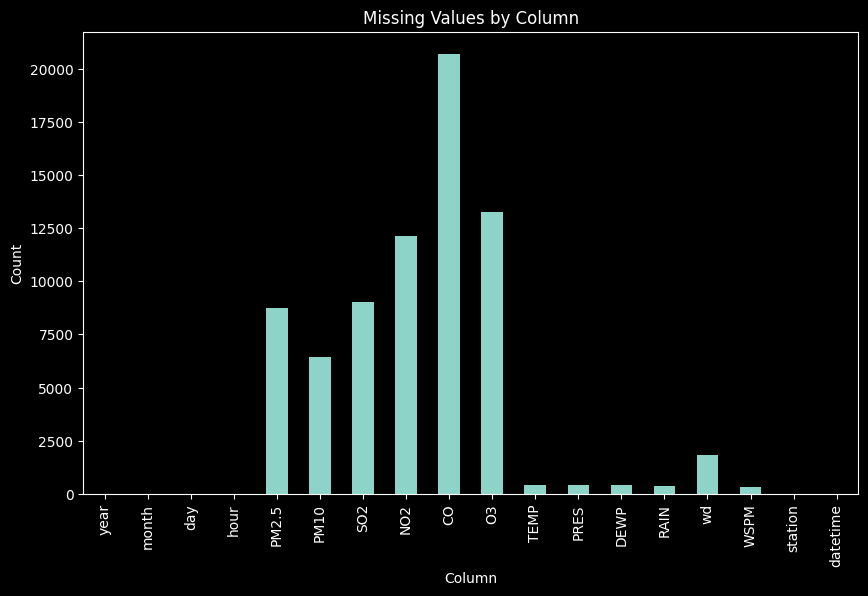

In [8]:
missing = df.isna().sum()
missing.plot(kind='bar', figsize=(10, 6))
plt.title('Missing Values by Column')
plt.ylabel('Count')
plt.xlabel('Column')
plt.show()

In [9]:
missing_dist = df.isna()

In [10]:
df_interp = df[list(df.select_dtypes(include='float64').columns)].interpolate(method='linear')
df_interp[['station', 'wd', 'year', 'month', 'day', 'hour', 'datetime']] = df[['station', 'wd', 'year', 'month', 'day', 'hour', 'datetime']]
df_interp['wd'] = df['wd'].ffill()
df_interp.set_index('datetime', inplace=True)

In [11]:
missing_interp = df_interp.isna().sum()
print(missing_interp)

PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
wd         0
year       0
month      0
day        0
hour       0
dtype: int64


In [12]:
print('Start date: ',df_interp.index.min(),'\n','End date: ',df_interp.index.max())

Start date:  2013-03-01 00:00:00 
 End date:  2017-02-28 23:00:00


In [32]:
df.to_csv('output_data/cleaned.csv', columns=df.columns)
df_interp.to_csv('output_data/cleaned_interp.csv', columns=df_interp.columns)